In [419]:
# построение матрицы частот взаимных встреч тегов

# кластеринг на графах (ребра с весами) -> иерархическое древо

# Matrix dimensional reduction?

# вектор -> растр -> вектор для сравнения качества векторизации (SVG)

# ME TO DO 1 - reccommendation sustem on tags recommendtation for authors when they input, what they've drawn
# and more tag analysis
# A/B experimetn - 2 pretty sililar (or completely similar pics) with author's only tags and with recommended tags



# общий дизайн улучшения

1402.i020 sketch shoes.jpg



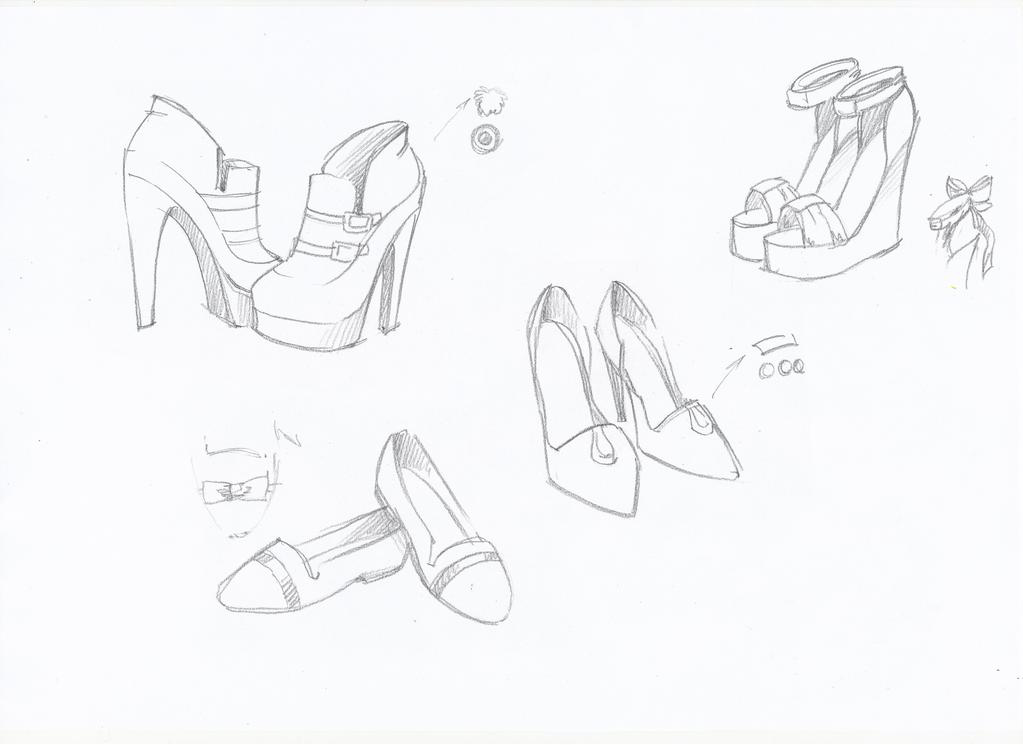

In [409]:
select = random.choice(tags)
img = Image.open(way_pics + "\\" + select[0])
words = []
print(select[0])
for i in select[1]:
    print(i[0])
img

# Image recognition model for illustrations

The goal is to tag raster images (converted vector illustrations) 

Why not standard and well-known image recognition services? - they work with photos, not illustrations, illustration styles variy from author to author so the model has to be trained constantly

Python 3.5 | Windows 8

### 00 Summary

- to be added - 

### 01 Ideas | to do list |  comments

#### Ideas
1) принципиальная проблема 1 – зачастую теги соответствуют не всей картинке, а одной из ее составной частей. Например, в случае, если на картинке изображен набор иконок. В этом случае для каждой субкартинки есть свой тег. Но нейросеть не знает какой именно субкартинке принадлежит этот тег, она считает его атрибутом целой картинки и таким образом учится не лучшим образом. Как можно улучшить предсказание для таких картинок?. Ререшние - 1) найти сет отдельных иконок с тагами и прогнать обучение на нем 2) разбить картинки данного сета на более мелкие части и проставить теги на каждую из них в ручную (большая трудоемкость) 3) научить модель опозновать картинки, состоящие из составных частей и прогонять распознование на каждой из них (общая идея)

2) принципиальная проблема 2 – что делать с тем, что картинки разного размера? Возможные решения - (1) обрезание (crop) (потеря информации, что негативно влияет на качество предсказания), (2) сжатие/растяжение (потеря информации + деформация, что может очень негаивно влиять на качество предсказания (3) создание из одной картинки нескольких, которые покрывают всю картинку (таких способов существует много), затем прогон модели на каждой из них, затем комбинирование предсказаний

3) принципиальная проблема 3 – результаты модели должны быть инвариантны относительно следующих изменений картинки: 1) поворот, отражение, 2) равномерный сдвиг всей картинки 3) перестановки составных независимых частей (например, если на картинке 2 объекта - машина и человек, их изображения раздельны и разнесены по разным частям картинки, то при их замене местами результат модели должен остаться прежним). 4) скарлирование составных независимых частей

Пункты теоретически спорные, т.к. некоторые понятия меняются в зависимости от положения объектов (например, приближаться, удаляться), принебрежем обучением таких концепций и сосредоточимся на том, чтобы не зависить в обучении от сдвигов/поворотов/перемешиваний. Это нужно затем, что авторы могут рисовать одни и те же элементы (например, машины) в разных местах изображения, разного размера, и модель должна понимать, что хоть элементы по-разному расположены и имеют разный рамер, они значат одно и то же

3.1) openCV - выделение особых точек, метод в принципе построен уже с учетом таковых требований. нейронные сети - в базовом варианте сети входной слой принимает положение (i,j) пикселя на картинке, поэтому простая нейронная сеть таким требованиям не соответствует. workarounds?

4) тегирование – (1) распознование изображения - этап 1, самое сложеное (2) работа с тегами ((дополнение, порождение, синонимы и пр.), пример1, если есть теги "человек" и "доктор" -> создать тег "медицина", "здоровье, пример2 если есть тег Eiffel -> создать тег Eiffel tower, пример3 если есть тег "машина" -> добавить тег транспорт (категория), пример4 если есть тег "еда"-> добавить тег "пища" (синоним)) оставим на этап 2, как второстепенную задачу, при этом непременно очень важную и в высокой степени влияющую на качество

5) распознование слов на изображениях -> словарь принадлежности слов к темам/тегам -> порождение тегов.

6) SVG формат вполне читабелен в блокноте -> можно использовать для порождения новых векторных изображений на програмном уровне

7) стиль векторных иллюстраций очень изменчив - их сложно обучать

In [299]:
# выделение составных частей изображения (по разным границам)

In [300]:
# hidden latent layers?

In [370]:
# дополнить задачу следующим этапом - рекомендация по самым искомым/популярным тегам

In [318]:
# выделение кусков из векторов?

#bag of images?

In [379]:
# подход с точки зрения не распознавания изображений, а связных словарей,
# которые затем пойдут в рекомендации авторам

In [380]:
# сначала изучить задачу помощи в рекоммендациям авторам

#### To do list

1.0) предобработка данных

1.1) сопоставить файл тегов и картинки (join), устранить дубликаты

2) сделать корректную кросс-валидацию для обучения. Идея в том, чтобы теги были равномерно распределены по train/test сетам

3) cделать метрику качества полученной модели

4) выбор и тренинг на нескольких моделях

5.1) CNN

5.1.1) Техническая подзадача 1 – использование GPU для ускорения вычислений (openCL (на Radeon) / cuda for faster training)

5.1.2)  Техническая подзадача 2 – to minimize the size of vectorized image representation for learning. Now numpy.array takes 10x more space in RAM compared to image size on HDD. Possible options – to minimize the size of the array by adding dtype or somehow else. another representation?

5.1.3) Техническая подзадача 3 – размер сети. Для картинки 1024x1024 в данный момент memory error. workarounds? Dimensional reduction (probably won't work), image rescaling (probalby ok, but quality reduction), anything else?

5.2) OpenCV

5.3) look for other methods

6) do the [quality of the model] to [number of items in train set] to check the learning curve 


other_1) изображения с иконками (1) - вычислить их количество, (2) оценить трудоемкость в человекочасах по разрезанию и тегированию составных частей



### 02 Imports

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from IPython.display import Image, HTML
from IPython.display import clear_output
import pylab
import glob, os
from PIL import Image
import theano
import keras
import random
import itertools
import collections

# pandas display options
pd.options.display.max_columns = 100 #def100
pd.options.display.max_colwidth = 100 #def100
pd.options.display.max_rows = 100 #def 100

%matplotlib inline  

Using Theano backend.


### 03 Ways to inputs

In [2]:
way = "G:\!datascience\!image_class\Image_class_01"
way_pics = "G:\!google_drive\pics+keywords (1)\pic"
tag_file = "G:\!google_drive\pics+keywords (1)\sample01.txt"

In [165]:
# pic1 = "1309.i001.001.S.m001.c18.Arabic Royal Pattern.jpg"

### 04 Functions

In [3]:
def get_file_names_of_pics(way = way_pics,
                           pics_available_types = ['.jpg','.JPG']):
# getting file names of pics
# just by getting names of all files in the dirrectory
# and filtering them by extension
    os.chdir(way_pics)
    pics = [] 
    for file in glob.glob("*"):
        pics.append(file)
    pics = [pic for pic in pics if pic[-4:] in pics_available_types]
#     os.chdir(way)
#     print(len(pics))
#     pics[:10]
    return(pics)

# pics_types = set([i[-4:] for i in pics])
# pics_types

In [4]:
def get_pics_sizes(pics):
    pics_sizes = []
    for pic in pics:
    # implement parallel computing for speed boost?
#         if pic[-4:].lower() == '.jpg':
        im=Image.open(way_pics + "\\" + pic)
        pics_sizes.append(im.size) # (width,height) tuple
    return(pics_sizes)

In [8]:
def plot_pics_sizes_distribution(pics_sizes):
    #plotting Node vs friends age distribution
    x = [i[0] for i in pics_sizes] #width
    y = [i[1] for i in pics_sizes] #height
    ax = plt.subplot(111)
    plt.scatter(x, y, alpha = 0.03,) 
    ax.set_title('Image resolution distribution')
    ax.set_xlabel('width')
    ax.set_ylabel('height')
    # pylab.savefig("age_distr1", bbox_inches='tight')
    plt.show()
# plot_pics_sizes_distribution()

In [7]:
def calc_share_of_imgs_based_on_resolution(pics_sizes, height = 1024, width = 1024):
    return(sum([((i[0] == width) and (i[1] == height)) for i in pics_sizes])/len(pics_sizes))

In [9]:
def read_tag_file(tag_file = tag_file):
    # read the tag file and put it into a list form
    # also form a tags_bag - a list with all tags to analyse it

    # it runs too long, maybe parallel computing?

    tags=[]
    with open(tag_file, 'r') as f:
        for line in f:
            tags.append(line.replace('\n',''))
    tags = [item.split('\t') for item in tags] 
    tags = [[item[0], [i for i in item[1].split(';')]] for item in tags]
    tags = [i for i in tags if i[1] != ['']] # remove all tags with no description
    tags_bag = [item[1] for item in tags]
    tags_bag = [item for sublist in tags_bag for item in sublist]
#     tags_bag[:5]
    return(tags, tags_bag)

In [10]:
def clean_and_merge(pics, pics_sizes, tags):
    # removing duplicate tags
    # as of now there can be no duplicate pics since the OS prohibits duplicate names
    # removing pics with no corresponding tags
    # matching remaining pics with corresponding tags
    tags_df = pd.DataFrame(data = tags,columns = ['pic','tag']).drop_duplicates(subset = 'pic', keep='first')
    pics_df = pd.DataFrame(data = {'pic':pics,'pic_size':pics_sizes}).merge(tags_df, on='pic', how='left').dropna()
#     pics_df.columns = ['pic', 'tags']
    return pics_df

In [11]:
# def save_and_load(pics_df):
#     os.path.isfile(way + '\\' + 'pics_df') == True
#     pics_df.to_csv(path_or_buf = way + '\\' + 'pics_df', index = False)
#     pics_df =  pd.read_csv(way + '\\' + 'pics_df', encoding = 'windows-1250')

In [476]:
def load_inputs(way = way):
    if os.path.isfile(way + '\\' + 'pics_df') == True:
        pics_df =  pd.read_csv(way + '\\' + 'pics_df', encoding = 'windows-1250')
    else:
        pics = get_file_names_of_pics()
        pics_sizes = get_pics_sizes(pics = pics) #that's very long
        tags, tags_bag = read_tag_file()
#         tags_names = [item[0] for item in tags]
#         tags_tags = [item[1] for item in tags]
        pics_df = clean_and_merge(pics = pics, tags = tags, pics_sizes = pics_sizes)
        pics_df.to_csv(path_or_buf = way + '\\' + 'pics_df', index = False)
    return pics_df

In [521]:
def pic_open(i, way_pics):
    img = Image.open(way_pics + "\\" + i).convert('RGB') # sometimes there is CMYK
    img = img.resize((128,128),Image.ANTIALIAS)
    img = np.reshape(img, (3,128,128))
    return img

def find_bad_pics(df,way_pics = way_pics):
    err_arr = []
    for pic in df:
        try:
            pic_open(pic, way_pics = way_pics)
        except:
            err_arr.append(pic)
#             print(pic)
    return err_arr

def do_find_bad_pics(df = X):
    err_arr = find_bad_pics(X)
    pd.DataFrame(err_arr).to_csv(path_or_buf = way + '\\' + 'err_pic_df', encoding = 'windows-1250', index = False)
    err_pic_df =  pd.read_csv(way + '\\' + 'err_pic_df', encoding = 'windows-1250')
    return list(err_pic_df['0'].values)

# to write function
# for i in err_pic_df:
#     pics_df = pics_df.drop(pics_df[pics_df['pic'] == i].index)

### 05 Reading inputs

In [13]:
pics_df = load_inputs(way=way)

In [14]:
pics_df

,pic,pic_size,tag
0,1309.i001.001.S.m001.c18.Arabic Royal Pattern.jpg,"(1024, 890)","['royal pattern', 'arabic pattern', 'flower', 'background', 'design', 'islam', 'motif', 'decorat..."
1,1309.i001.001.S.m001.c18.Black Floral Arabic Pattern -var_131121.jpg,"(1024, 890)","['wedding', 'decoration', 'filigree', 'design', 'vintage', 'old', 'arabesque', 'art', 'set', 'me..."
2,1309.i001.002.S.m001.c17.Black Cat with Green Eyes.jpg,"(1024, 1024)","['cat', 'black', 'pets', 'drawing', 'green', 'eyes', 'line', 'icon', 'tail', 'cartoon', 'white b..."
3,1309.i001.003.S.m001.c17.Blue Moon.jpg,"(1024, 1024)","['moon', 'crescent', 'blue moon', 'decoration', 'bedtime', 'magic', 'night', 'celebration', 'xma..."
4,1309.i001.004.S.m001.c17.Bunch of Bananas.jpg,"(1024, 796)","['banana', 'natural', 'watercolor', 'yellow', 'illustration', 'fruit', 'sweet', 'lifestyle', 'or..."
5,1309.i001.005.S.m001.c17.Floral lace pattern for design.jpg,"(1024, 1024)","['lace', 'pattern', 'vector', 'background', 'illustration', 'vintage', 'floral', 'flower', 'seam..."
6,1309.i001.006.S.m001.c17.Floral Seamless Pattern.jpg,"(1024, 890)","['flower', 'symbol', 'revival', 'textile', 'wallpaper', 'beige', 'royal', 'retro', 'curves', 'se..."
7,1309.i001.007.S.m001.c17.Golden Sun.jpg,"(1024, 1024)","['sun', 'golden sun', 'sun face', 'shine', 'sunlight', 'allegory', 'warm', 'mayan', 'day', 'life..."
8,1309.i001.008.S.m001.c17.Lace Seamless pattern.jpg,"(910, 1024)","['lace', 'lace pattern', 'clothing', 'greeting', 'decoration', 'flower', 'floral', 'curled', 'fa..."
9,1309.i001.009.S.m001.c17.Magic Red Star.jpg,"(1024, 1024)","['magic star', 'red star', 'illuminated', 'award', 'prize', 'sign', 'glitter', 'bright', 'illust..."


In [512]:
err_pic_df = list(err_pic_df['0'].values)

In [515]:
len(pics_df)

24282

In [518]:
len(pics_df)

24266

In [519]:
len(err_pic_df)

16

In [520]:
24282 - 24266

16

In [147]:
pics_df[:2]

,pic,pic_size,tag
0,1309.i001.001.S.m001.c18.Arabic Royal Pattern.jpg,"(1024, 890)","[royal pattern, arabic pattern, flower, background, design, islam, motif, decorative, decoration..."
1,1309.i001.001.S.m001.c18.Black Floral Arabic Pattern -var_131121.jpg,"(1024, 890)","[wedding, decoration, filigree, design, vintage, old, arabesque, art, set, mexican, style, royal..."


In [153]:
# pics_sizes = get_pics_sizes()

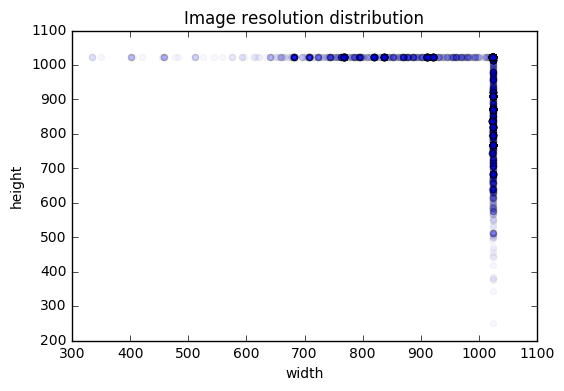

In [11]:
plot_pics_sizes_distribution()

In [12]:
calc_share_of_imgs_based_on_resolution(height = 1024, width = 1024)
# 82% of all pictures has the same resolution (82%)
# at first let's train algo on them and
# at second - think of how to manage with others (resizing, cropping etc.)

0.8241254914677151

In [414]:
tags, tags_bag = read_tag_file()

### 06 Work in progress

In [19]:
len(tags_names)

25116

In [ ]:
pics_sizes

In [20]:
len(set(tags_names))

24601

In [21]:
len(pics)

24671

In [135]:
tags_df = pd.DataFrame(data = tags, columns = ['pic','tag'])

In [286]:
pics_df.to_csv(path_or_buf = way + '\\' + 'pics_df', index = False)

In [132]:
pics_df = pd.DataFrame(data = {'pic':pics,'pic_size':pics_sizes})

In [287]:
pics_df_1 =  pd.read_csv(way + '\\' + 'pics_df', encoding = 'windows-1250')

In [288]:
pics_df_1

,pic,pic_size,tag
0,1309.i001.001.S.m001.c18.Arabic Royal Pattern.jpg,"(1024, 890)","['royal pattern', 'arabic pattern', 'flower', 'background', 'design', 'islam', 'motif', 'decorat..."
1,1309.i001.001.S.m001.c18.Black Floral Arabic Pattern -var_131121.jpg,"(1024, 890)","['wedding', 'decoration', 'filigree', 'design', 'vintage', 'old', 'arabesque', 'art', 'set', 'me..."
2,1309.i001.002.S.m001.c17.Black Cat with Green Eyes.jpg,"(1024, 1024)","['cat', 'black', 'pets', 'drawing', 'green', 'eyes', 'line', 'icon', 'tail', 'cartoon', 'white b..."
3,1309.i001.003.S.m001.c17.Blue Moon.jpg,"(1024, 1024)","['moon', 'crescent', 'blue moon', 'decoration', 'bedtime', 'magic', 'night', 'celebration', 'xma..."
4,1309.i001.004.S.m001.c17.Bunch of Bananas.jpg,"(1024, 796)","['banana', 'natural', 'watercolor', 'yellow', 'illustration', 'fruit', 'sweet', 'lifestyle', 'or..."
5,1309.i001.005.S.m001.c17.Floral lace pattern for design.jpg,"(1024, 1024)","['lace', 'pattern', 'vector', 'background', 'illustration', 'vintage', 'floral', 'flower', 'seam..."
6,1309.i001.006.S.m001.c17.Floral Seamless Pattern.jpg,"(1024, 890)","['flower', 'symbol', 'revival', 'textile', 'wallpaper', 'beige', 'royal', 'retro', 'curves', 'se..."
7,1309.i001.007.S.m001.c17.Golden Sun.jpg,"(1024, 1024)","['sun', 'golden sun', 'sun face', 'shine', 'sunlight', 'allegory', 'warm', 'mayan', 'day', 'life..."
8,1309.i001.008.S.m001.c17.Lace Seamless pattern.jpg,"(910, 1024)","['lace', 'lace pattern', 'clothing', 'greeting', 'decoration', 'flower', 'floral', 'curled', 'fa..."
9,1309.i001.009.S.m001.c17.Magic Red Star.jpg,"(1024, 1024)","['magic star', 'red star', 'illuminated', 'award', 'prize', 'sign', 'glitter', 'bright', 'illust..."


In [160]:
pics_df = pics_df[pics_df['pic_size'] == (1024,1024)].reset_index()
# let's concentrate on squared images

In [165]:
pics_df.ix[0,'pic']

'1309.i001.002.S.m001.c17.Black Cat with Green Eyes.jpg'

In [133]:
img = Image.open(way_pics + "\\" + pics_df.ix[3,'pic'])
X_2 = img.resize((128,128),Image.ANTIALIAS)
img = Image.open(way_pics + "\\" + pics_df.ix[2,'pic'])
X_3 = img.resize((128,128),Image.ANTIALIAS)

In [138]:
X_2 = np.reshape(X_2, (3,128,128))
X_3 = np.reshape(X_3, (3,128,128))

In [ ]:
img = Image.open(way_pics + "\\" + pics_df.ix[2,'pic'])
X = img.resize((128,128),Image.ANTIALIAS)
X_1 = 

In [61]:
np.array(X).shape

(128, 128, 3)

In [161]:
y_target = pics_df['tag'].astype(str).str.contains('people')*1

In [539]:
import lasagne
from theano import tensor as T
from lasagne.nonlinearities import *

In [540]:
input_X = T.tensor4("X")
target_y = T.vector("target Y integer",dtype='int32')

In [541]:
# https://github.com/Lasagne/Lasagne
# images 
    
input_layer = lasagne.layers.InputLayer(shape=(None,3,128,128), input_var=input_X)
conv_1 = lasagne.layers.Conv2DLayer(input_layer, 64, (3, 3),
                                    nonlinearity=leaky_rectify, name="conv_1")
conv_2 = lasagne.layers.Conv2DLayer(conv_1, 32, (3, 3),
                                    nonlinearity=leaky_rectify, name="conv_2")
pool = lasagne.layers.Pool2DLayer(conv_2, (3, 3), stride=2, mode='max', name="pool")
dense = lasagne.layers.DenseLayer(lasagne.layers.dropout(pool, 0.5),
                                    128, nonlinearity=leaky_rectify,
                                    W=lasagne.init.Orthogonal(), name="dense")
dense_output = lasagne.layers.DenseLayer(lasagne.layers.dropout(dense, 0.5),
                                    2, nonlinearity=softmax, name="output")

In [446]:
# Mnist
input_layer = lasagne.layers.InputLayer(shape=(None,1,28,28), input_var=input_X)
conv_1 = lasagne.layers.Conv2DLayer(input_layer, 14, (3, 3),
                                    nonlinearity=leaky_rectify, name="conv_1")
conv_2 = lasagne.layers.Conv2DLayer(conv_1, 7, (3, 3),
                                    nonlinearity=leaky_rectify, name="conv_2")
pool = lasagne.layers.Pool2DLayer(conv_2, (3, 3), stride=2, mode='max', name="pool")
dense = lasagne.layers.DenseLayer(lasagne.layers.dropout(pool, 0.5),
                                    128, nonlinearity=leaky_rectify,
                                    W=lasagne.init.Orthogonal(), name="dense")
dense_output = lasagne.layers.DenseLayer(lasagne.layers.dropout(dense, 0.5),
                                    10, nonlinearity=softmax, name="output")

In [542]:
#предсказание нейронки (theano-преобразование)
y_predicted = lasagne.layers.get_output(dense_output)

In [234]:
# help(lasagne.layers.Conv2DLayer)

In [543]:
#все веса нейронки (shared-переменные)
all_weights = lasagne.layers.get_all_params(dense_output)
print(all_weights)

[conv_1.W, conv_1.b, conv_2.W, conv_2.b, dense.W, dense.b, output.W, output.b]


In [544]:
#функция ошибки - средняя кроссэнтропия
loss = lasagne.objectives.categorical_crossentropy(y_predicted,target_y).mean()

accuracy = lasagne.objectives.categorical_accuracy(y_predicted,target_y).mean()

#сразу посчитать словарь обновлённых значений с шагом по градиенту, как раньше
updates_sgd = lasagne.updates.rmsprop(loss, all_weights,learning_rate=0.01)

In [545]:
#функция, которая обучает сеть на 1 шаг и возвращащет значение функции потерь и точности
train_fun = theano.function([input_X,target_y],[loss,accuracy],updates= updates_sgd)

#функция, которая считает точность
accuracy_fun = theano.function([input_X,target_y],accuracy)

In [437]:
def batch_return(pics_names_set,way_pics=way_pics):
    # gets array of pic names
    # returns array of inputs for CNN
    # reads number of images with known names
    # resizes them (if needed)
    # converts shape as needed
    batch_return_data = []
    for i in pics_names_set:
        img = Image.open(way_pics + "\\" + i).convert('RGB') # sometimes there is CMYK
        img = img.resize((128,128),Image.ANTIALIAS)
        img = np.reshape(img, (3,128,128))
#         if len(batch_return_data)!=0:
#         print(i)
        batch_return_data.append(img)

#         else:
#             batch_return_data = np.array(img)
    return np.array(batch_return_data)

In [259]:
a = np.array([1,2])
a.insert([3,4])

AttributeError: 'numpy.ndarray' object has no attribute 'insert'

In [430]:
# вспомогательная функция, которая возвращает список мини-батчей для обучения нейронки

#на вход
# inputs - тензор из картинок размером (много, 1, 28, 28), например - X_train
# targets - вектор из чиселок - ответов для каждой картинки из X; например - Y_train
# batchsize - одно число - желаемый размер группы

#что нужно сделать
# 1) перемешать данные
# - важно перемешать targets и targets одним и тем же образом, чтобы сохранить соответствие картинки ответу на неё
# 3) побить данные на подгруппы так, чтобы в каждой подгруппе было batchsize картинок и ответов
# - если число картинок не делится на batchsize, одну подгруппу можно вернуть другого размера
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield batch_return(inputs[excerpt]), targets[excerpt] # pics
#         yield inputs[excerpt], targets[excerpt] # Mnist

In [197]:
a = np.array([])
a = np.append(a,[1,2])
a

array([ 1.,  2.])

In [439]:
y = pics_df['tag'].astype(str).str.contains('pictogram')*1
X = pics_df['pic'].values

In [440]:
sum(y)

5415

In [276]:
b = []
b = b.append(2)
b

In [149]:
# проверить, будет ли работать сеть со входом 1024x1024

In [546]:
y_target = pics_df['tag'].astype(str).str.contains('pictogram')*1
y = y_target
X = pics_df['pic'].values
# X_train = X[0:20]
# X_val = X[20:40]
# y_train = y[0:20]
# y_val = y[20:40]

# X_train = X[0:300]
# X_val = X[300:400]
# y_train = y[0:300]
# y_val = y[300:400]

# X_train = X[0:100]
# X_val = X[100:200]
# y_train = y[0:100]
# y_val = y[100:200]

# X_train = X[0:1200]
# X_val = X[1200:1400]
# y_train = y[0:1200]
# y_val = y[1200:1400]

X_train = X[0:10000]
X_val = X[10000:11000]
y_train = y[0:10000]
y_val = y[10000:11000]

In [529]:
sum(y[0:1200].values) / 1200
# sum(y[1200:1400].values)

0.18416666666666667

In [530]:
y_val.mean()

0.29599999999999999

In [531]:
y_train.mean()

0.24099999999999999

In [441]:
len(X)

24282

In [221]:
983040* 1 /128/128/3

20.0

In [412]:
freq

NameError: name 'freq' is not defined

In [381]:
list(X_train).index('1311.i013.027.P.m002.c20.Retro video games monsters.jpg')

479

In [387]:
X_train[480]

'1311.i013.028.S.m002.c10.game monsters.jpg'

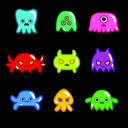

In [393]:
img = Image.open(way_pics + "\\" + X_train[480]).convert('RGB') # sometimes there is CMYK
img
img = img.resize((128,128),Image.ANTIALIAS)
# img = np.reshape(img, (3,128,128))
img

In [264]:
X_train.shape

(20,)

In [280]:
np.array(batch_return(X_train)).shape

(20, 3, 128, 128)

In [374]:
# list(iterate_minibatches(X_train, y_train,batch_size))

In [547]:
# img

import time

num_epochs = 30 #количество проходов по данным

batch_size = 50 #размер мини-батча

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_acc = 0
    train_batches = 0
    start_time = time.time()
    for batch in iterate_minibatches(X_train, y_train,batch_size):
        inputs, targets = batch
        train_err_batch, train_acc_batch= train_fun(inputs, targets)
        train_err += train_err_batch
        train_acc += train_acc_batch
        train_batches += 1

    # And a full pass over the validation data:
    val_acc = 0
    val_batches = 0
    for batch in iterate_minibatches(X_val, y_val, batch_size):
        inputs, targets = batch
        val_acc += accuracy_fun(inputs, targets)
        val_batches += 1

    
    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))

    print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
    print("  train accuracy:\t\t{:.2f} %".format(
        train_acc / train_batches * 100))
    print("  validation accuracy:\t\t{:.2f} %".format(
        val_acc / val_batches * 100))

Epoch 1 of 30 took 10319.621s
  training loss (in-iteration):		17708.993470
  train accuracy:		61.47 %
  validation accuracy:		65.00 %
Epoch 2 of 30 took 9709.781s
  training loss (in-iteration):		15249.852379
  train accuracy:		61.34 %
  validation accuracy:		67.90 %
Epoch 3 of 30 took 8465.790s
  training loss (in-iteration):		6886.855560
  train accuracy:		64.13 %
  validation accuracy:		65.90 %
Epoch 4 of 30 took 8127.843s
  training loss (in-iteration):		29086.434491
  train accuracy:		62.91 %
  validation accuracy:		60.80 %
Epoch 5 of 30 took 8741.097s
  training loss (in-iteration):		28812.147115
  train accuracy:		62.12 %
  validation accuracy:		65.60 %
Epoch 6 of 30 took 8115.741s
  training loss (in-iteration):		24748.637101
  train accuracy:		62.37 %
  validation accuracy:		66.00 %
Epoch 7 of 30 took 8310.374s
  training loss (in-iteration):		12498.229263
  train accuracy:		62.57 %
  validation accuracy:		62.40 %
Epoch 8 of 30 took 9878.209s
  training loss (in-iteration):		

In [ ]:
df = df.drop(df[df.score < 50].index)

In [535]:
len(X) - len(pics_df)

16

In [537]:
list(X).index('1407.i041.017.F.m005.c5.education seamless pattern ńhalkboard.jpg')

5763

In [489]:
sum(pics_df['tag'].astype(str).str.contains('pictogram')*1)

5415

In [491]:
pics_df['tag'].isin('pictogram')*1

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

In [410]:
# Mnist
import time

num_epochs = 10 #количество проходов по данным

batch_size = 50 #размер мини-батча

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_acc = 0
    train_batches = 0
    start_time = time.time()
    for batch in iterate_minibatches(X_train, y_train,batch_size):
        inputs, targets = batch
        train_err_batch, train_acc_batch= train_fun(inputs, targets)
        train_err += train_err_batch
        train_acc += train_acc_batch
        train_batches += 1

    # And a full pass over the validation data:
    val_acc = 0
    val_batches = 0
    for batch in iterate_minibatches(X_val, y_val, batch_size):
        inputs, targets = batch
        val_acc += accuracy_fun(inputs, targets)
        val_batches += 1

    
    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))

    print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
    print("  train accuracy:\t\t{:.2f} %".format(
        train_acc / train_batches * 100))
    print("  validation accuracy:\t\t{:.2f} %".format(
        val_acc / val_batches * 100))

Epoch 1 of 10 took 117.353s
  training loss (in-iteration):		0.320324
  train accuracy:		90.48 %
  validation accuracy:		93.30 %
Epoch 2 of 10 took 112.605s
  training loss (in-iteration):		0.263757
  train accuracy:		93.14 %
  validation accuracy:		94.94 %
Epoch 3 of 10 took 114.353s
  training loss (in-iteration):		0.286737
  train accuracy:		93.17 %
  validation accuracy:		94.12 %
Epoch 4 of 10 took 118.264s
  training loss (in-iteration):		0.310326
  train accuracy:		92.92 %
  validation accuracy:		94.61 %
Epoch 5 of 10 took 116.767s
  training loss (in-iteration):		0.369253
  train accuracy:		92.10 %
  validation accuracy:		94.75 %
Epoch 6 of 10 took 115.241s
  training loss (in-iteration):		0.408059
  train accuracy:		91.29 %
  validation accuracy:		86.22 %
Epoch 7 of 10 took 124.893s
  training loss (in-iteration):		0.438768
  train accuracy:		90.93 %
  validation accuracy:		94.08 %
Epoch 8 of 10 took 131.517s
  training loss (in-iteration):		0.474440
  train accuracy:		90.45 %


In [458]:
list(X).index('1407.i041.017.F.m005.c5.education seamless pattern ńhalkboard.jpg')

5763

24282

In [479]:
err_pic_df

,0
0,1407.i041.017.F.m005.c5.education seamless pattern ńhalkboard.jpg
1,1407.i041.018.F.m005.c5.education icons ńhalkboard.jpg
2,1412.i027.024.P.m005.c23.ńlipboard with check list.jpg
3,1412.i027.040.S.m005.c11.hand with ńlipboard.jpg
4,1412.i027.042.S.m005.c11.ńlipboard with business icons.jpg
5,1412.i037.011.S.m004.c11.business 2ő2.jpg
6,1412.i039.030.S.m004.c11.casino isometric 2ő2.jpg
7,1501.i029.032.S.m005.c13.ńar service infographics.jpg
8,1501.i039.059.S.m004.c11.landscape isometric design 2ő2.jpg
9,1501.i047.017.S.m004.c11.landscape isometric design 2ő2.jpg


In [302]:
predict_function = theano.function([input_X], y_predicted)

In [ ]:
predict_function

In [341]:
i = 261
print(X[i])
print(y[i])
img = Image.open(way_pics + "\\" + X[i])
img = img.resize((128,128),Image.ANTIALIAS)
img = np.reshape(img, (3,128,128))
Z = np.array([img])
predict_function(Z)

1311.i004.050.S.m001.c10.winter sales.jpg
1


array([[ 1.,  0.]], dtype=float32)

In [346]:
1 - sum(y[0:300].values)/300

0.8666666666666667

In [360]:
60*6*60/10/1.5/2

720.0

In [401]:
X_train.shape

(50000, 1, 28, 28)

In [59]:
# главное, чтобы работала эта функция
# train_err_batch, train_acc_batch= train_fun(inputs, targets)

In [142]:
targets = [1,0]
# inputs = np.expand_dims(np.reshape(X, (3,128,128)), axis=0)
inputs = np.array((X_2,X_3))

In [84]:
np.array(X).shape

(128, 128, 3)

In [141]:
np.array((X_2,X_3))

(2, 3, 128, 128)

In [106]:
# X

In [92]:
np.expand_dims(np.array(X), axis=0).shape

(1, 128, 128, 3)

In [105]:
# np.reshape(X, (3,128,128))

In [80]:
X_train.shape

(50000, 1, 28, 28)

In [143]:
train_err_batch, train_acc_batch= train_fun(inputs, targets)

In [148]:
train_err_batch

array(inf, dtype=float32)

In [119]:
MB =[]
for i in iterate_minibatches(X_train, y_train,batchsize = 30):
    MB.append(i)

In [154]:
# MB[0][0]

array(['1309.i001.001.S.m001.c18.Arabic Royal Pattern.jpg',
       '1309.i001.001.S.m001.c18.Black Floral Arabic Pattern -var_131121.jpg',
       '1309.i001.002.S.m001.c17.Black Cat with Green Eyes.jpg', ...,
       'Winter day houses pattern.jpg', 'Winter night houses pattern.jpg',
       'Winter sky houses pattern.jpg'], dtype=object)

In [399]:
from mnist import load_dataset
X_train,y_train,X_val,y_val,X_test,y_test = load_dataset()

In [400]:
X_train

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       ..., 
       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [

In [56]:
# X_train[0]
# X_train[0][0]

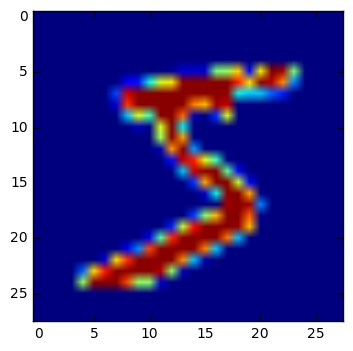

In [26]:
plt.imshow(X_train[0,0])

In [110]:
pics_df = pics_df.dropna()

In [ ]:
>>> df = DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'f']})
>>> df.isin([1, 3, 12, 'a'])
       A      B
0   True   True
1  False  False
2   True  False

In [216]:
pics_df.astype(str).dtypes

index       object
pic         object
pic_size    object
tag         object
dtype: object

In [233]:
# pics_df['tag'].str.contains(pat = 'people', case = False)

In [186]:
pics_df[pics_df['tag'].str.contains('people') == True]

,index,pic,pic_size,tag


In [416]:
unique, counts = np.unique(tags_bag, return_counts=True)
freq = np.asarray((unique, counts)).T 

freq = pd.DataFrame(freq, columns=['tag','frequency'])
freq['frequency'] = freq['frequency'].astype(np.int64)

freq = freq.sort_values(by='frequency', ascending=False)
# freq['frequency'].hist(bins = 1000)

In [417]:
freq

,tag,frequency
14571,vector,24387
7051,illustration,24355
4046,design,22309
12148,set,17983
3034,collection,14665
2072,business,13893
7405,isolated,13868
3927,decorative,13668
13483,symbol,13093
4731,elements,11917


In [13]:
# plt.bar(np.arange(len(freq['frequency'])), freq['frequency'].values)
# plt.show()

In [34]:
# freq[freq['frequency']<1000] 

In [15]:
len(freq)/100

153.07

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000ECD2CBEA58>]], dtype=object)

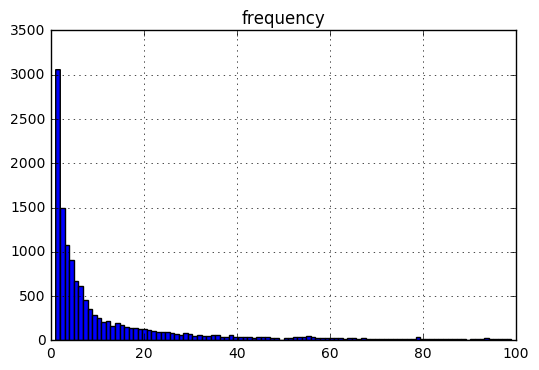

In [16]:
freq[freq['frequency']<100].hist(bins=100)

In [181]:
freq

,tag,frequency
14572,vector,24387
7052,illustration,24355
4047,design,22309
12149,set,17983
3035,collection,14665
2073,business,13893
7406,isolated,13868
3928,decorative,13668
13484,symbol,13093
4732,elements,11917


In [17]:
freq.describe()

,frequency
count,15307.000000
mean,77.259881
std,564.655805
min,1.000000
25%,2.000000
50%,6.000000
75%,27.000000
max,24387.000000


In [18]:
len(freq)

15307

In [19]:
# если какой-то таг присутствует 1 раз, (можно обобщить, как менее X раз)
# то его нельзя научиться распозновать
# можно только "работать с текстом" - считать, с какими комбинациями текста этот тег встречается,
# и затем добавлять его в прогнозы на такой основе
# оставим эту задачу на 2-ой этап. сначала - распознование изображений
len(freq[freq['frequency']==1])

3057

In [ ]:
# network
# https://www.kaggle.com/fchollet/digit-recognizer/simple-deep-mlp-with-keras/code
# http://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [ ]:
# import numpy as np
# import Image

# img = Image.open('orig.png').convert('RGBA')
# arr = np.array(img)

# # record the original shape
# shape = arr.shape

# # make a 1-dimensional view of arr
# flat_arr = arr.ravel()

# # convert it to a matrix
# vector = np.matrix(flat_arr)

# # do something to the vector
# vector[:,::10] = 128

# # reform a numpy array of the original shape
# arr2 = np.asarray(vector).reshape(shape)

# # make a PIL image
# img2 = Image.fromarray(arr2, 'RGBA')
# img2.show()

In [22]:
img = Image.open(way_pics + "\\" + pic1).convert('RGB')

In [23]:
np.array(Image.open(way_pics + "\\" + pic1).convert('RGB')).ravel()

array([ 89,  94, 113, ..., 104, 114, 123], dtype=uint8)

In [24]:
arr = np.array(img)
len(arr.ravel())

2734080

In [26]:
# X_train =
# X_test =
# y_train =
# y_test =

In [27]:
squared_images_ind = [(i == (1024,1024))*1 for i in pics_sizes]
# squared_images_ind 
squared_images = [img for ind, img in zip(squared_images_ind, pics) if ind]


In [40]:
squared_images_ind[:10]

[0, 0, 1, 1, 0, 1, 0, 1, 0, 1]

In [53]:
pics[:10]

['1309.i001.001.S.m001.c18.Arabic Royal Pattern.jpg',
 '1309.i001.001.S.m001.c18.Black Floral Arabic Pattern -var_131121.jpg',
 '1309.i001.002.S.m001.c17.Black Cat with Green Eyes.jpg',
 '1309.i001.003.S.m001.c17.Blue Moon.jpg',
 '1309.i001.004.S.m001.c17.Bunch of Bananas.jpg',
 '1309.i001.005.S.m001.c17.Floral lace pattern for design.jpg',
 '1309.i001.006.S.m001.c17.Floral Seamless Pattern.jpg',
 '1309.i001.007.S.m001.c17.Golden Sun.jpg',
 '1309.i001.008.S.m001.c17.Lace Seamless pattern.jpg',
 '1309.i001.009.S.m001.c17.Magic Red Star.jpg']

In [42]:
squared_images[:10]

['1309.i001.002.S.m001.c17.Black Cat with Green Eyes.jpg',
 '1309.i001.003.S.m001.c17.Blue Moon.jpg',
 '1309.i001.005.S.m001.c17.Floral lace pattern for design.jpg',
 '1309.i001.007.S.m001.c17.Golden Sun.jpg',
 '1309.i001.009.S.m001.c17.Magic Red Star.jpg',
 '1309.i001.012.S.m001.c17.Parrot.jpg',
 '1309.i001.015.S.m001.c17.Seamless pattern with lace for design.jpg',
 '1309.i001.016.S.m001.c17.Surprised Pussy cat.jpg',
 '1310 business man characters pack - thumbnail.jpg',
 '1310 business woman characters pack - thumbnail.jpg']

In [56]:
squared_images_tags = [tag_list for ind, tag_list in zip(squared_images_ind, [i[1] for i in tags]) if ind]

In [2]:
# squared_images_tags

In [3]:
# tags[1]

In [51]:
help(zip)

Help on class zip in module builtins:

class zip(object)
 |  zip(iter1 [,iter2 [...]]) --> zip object
 |  
 |  Return a zip object whose .__next__() method returns a tuple where
 |  the i-th element comes from the i-th iterable argument.  The .__next__()
 |  method continues until the shortest iterable in the argument sequence
 |  is exhausted and then it raises StopIteration.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.



In [29]:
# error - need index on squarred indexes
# ERROR - tags not in order with pics!
# let's try to learn one of the tags
# next step - learn many of them
tag_1 = ['construction']
tag_1_ind = []
for i in range(len(pics)):
    if tag_1 in tags[i][1]:
        tag_1_ind.append(i)

In [33]:
# tags[:1]

In [30]:
X_train_ind = [i for i in range(50)] + tag_1_ind[0:50]
X_test_ind = [i+50 for i in range(50)] + tag_1_ind[50:100]

In [31]:
X_train = []
for img in [squared_images[i] for i in X_train_ind]:
    X_train.append(np.array(Image.open(way_pics + "\\" + img).convert('RGB')).ravel())
    
X_test = []
for img in [squared_images[i] for i in X_test_ind]:
    X_test.append(np.array(Image.open(way_pics + "\\" + img).convert('RGB')).ravel())
    


In [19]:
y_train = [0 for i in range(50)] + [1 for i in tag_1_ind[0:50]]
y_test = [0 for i in range(50)] + [1 for i in tag_1_ind[50:100]]

In [ ]:
len(X_train[0])

In [17]:
tags

[['1309.i001.001.S.m001.c18.Arabic Royal Pattern.jpg',
  ['royal pattern',
   'arabic pattern',
   'flower',
   'background',
   'design',
   'islam',
   'motif',
   'decorative',
   'decoration',
   'cover',
   'painted image',
   'luxury',
   'arabic',
   'deco',
   'royal',
   'texture',
   'ornament',
   'arabic style',
   'flourish',
   'template',
   'floral pattern',
   'filigree',
   'pattern',
   'abstract',
   'decor',
   'repeat',
   'illustrations and vector art',
   'seamless',
   'retro',
   'turkish culture',
   'silhouette',
   'flourishes',
   'leaf',
   'lace',
   'ornate',
   'traditional',
   'vintage',
   'illustration and painting',
   'retro revival',
   'east',
   'palace',
   'symmetry',
   'baroque',
   'textured',
   'middle eastern',
   'isolated',
   'old',
   'fashion',
   'illustration']],
 ['1309.i001.002.S.m001.c17.Black Cat with Green Eyes.jpg',
  ['cat',
   'black',
   'pets',
   'drawing',
   'green',
   'eyes',
   'line',
   'icon',
   'tail',
   'c

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

IS = len(X_train[0]) # Input Size 

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(IS, input_dim=20, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(IS/100, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(IS/1000, init='uniform'))
model.add(Activation('softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, y_train,
          nb_epoch=20,
          batch_size=16)
score = model.evaluate(X_test, y_test, batch_size=16)


C:\Anaconda3\lib\site-packages\keras\backend\theano_backend.py:140: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return variable(np.random.uniform(low=low, high=high, size=shape),


MemoryError: 

In [23]:
# memory error...
# dimensional reduction or other method

In [66]:
pics[:10]

['1309.i001.001.S.m001.c18.Arabic Royal Pattern.jpg',
 '1309.i001.001.S.m001.c18.Black Floral Arabic Pattern -var_131121.jpg',
 '1309.i001.002.S.m001.c17.Black Cat with Green Eyes.jpg',
 '1309.i001.003.S.m001.c17.Blue Moon.jpg',
 '1309.i001.004.S.m001.c17.Bunch of Bananas.jpg',
 '1309.i001.005.S.m001.c17.Floral lace pattern for design.jpg',
 '1309.i001.006.S.m001.c17.Floral Seamless Pattern.jpg',
 '1309.i001.007.S.m001.c17.Golden Sun.jpg',
 '1309.i001.008.S.m001.c17.Lace Seamless pattern.jpg',
 '1309.i001.009.S.m001.c17.Magic Red Star.jpg']

In [32]:
# pd.DataFrame(tags)

In [31]:
# pd.DataFrame(pics)

In [77]:
pics_tags = pd.merge(pd.DataFrame(pics), pd.DataFrame(tags), on=0).dropna(axis='index')

In [30]:
# pics_tags

In [106]:
print(len(pics_tags),len(pics),len(tags),len(set(pics)),len(set(tags_pics)))

25076 24672 25116 24672 24601


In [92]:
tags_pics = [i[0] for i in tags]
for i in pics_tags.index:
    if pics_tags.iloc[i,0] not in tags_pics:
        print('not_in_tags')
        print(pics_tags.ix[i])

In [97]:
pics_not_in_tags = []
for i in pics:
    if i not in tags_pics:
        pics_not_in_tags.append(i)

In [99]:
pics_not_in_tags[0]

'1405.i021.003.V.m004.c10.sketch chalkboard infographics (1).jpg'

In [42]:
# for i in tags_not_in_pics:
#     print(pics_tags[pics_tags[0] == i])

In [110]:
tags_not_in_pics = []
for i in tags_pics:
    if i not in pics:
        tags_not_in_pics.append(i)

In [109]:
# remove duplicates from tags !!!!

In [113]:
# rewrite all in functions

In [ ]:
before we add

In [171]:
tags
tags_pics = [i[0] for i in tags]
tags_tags = [i[1] for i in tags]

In [415]:
len(freq)

15307

In [29]:
# freq[freq['frequency']<800] 

In [28]:
# tags_bag

In [23]:
len(unique)

15307

In [50]:
# coeff

In [25]:
coeff = np.zeros((len(unique),len(unique)), dtype=np.float16)

In [37]:
coeff = pd.DataFrame(data = coeff, columns = list(unique), index = list(unique))

In [54]:
tags[0][1]

['royal pattern',
 'arabic pattern',
 'flower',
 'background',
 'design',
 'islam',
 'motif',
 'decorative',
 'decoration',
 'cover',
 'painted image',
 'luxury',
 'arabic',
 'deco',
 'royal',
 'texture',
 'ornament',
 'arabic style',
 'flourish',
 'template',
 'floral pattern',
 'filigree',
 'pattern',
 'abstract',
 'decor',
 'repeat',
 'illustrations and vector art',
 'seamless',
 'retro',
 'turkish culture',
 'silhouette',
 'flourishes',
 'leaf',
 'lace',
 'ornate',
 'traditional',
 'vintage',
 'illustration and painting',
 'retro revival',
 'east',
 'palace',
 'symmetry',
 'baroque',
 'textured',
 'middle eastern',
 'isolated',
 'old',
 'fashion',
 'illustration']

In [48]:
coeff.loc['fashion','fashion'] = 1

In [49]:
coeff.loc['fashion','fashion']

1.0

In [65]:
for t in tags[:100]:
    sublist = list(itertools.product(t[1],t[1]))
    for i in sublist:
        coeff.loc[i]+=1

In [71]:
def increase_wights(tag_list):
    sublist = list(itertools.product(tag_list[1],tag_list[1]))
    for i in sublist:
        coeff.loc[i]+=1

In [56]:
[[i,j] for i in tags[0][1], j in tags[0][1]]

SyntaxError: invalid syntax (<ipython-input-56-a2d9132511c7>, line 1)

In [ ]:
import itertools
>>> for i in itertools.product([1,2,3],['a','b'],[4,5]):
...         print i

In [62]:
a = list(itertools.product(tags[0][1],tags[0][1]))
a[0]

('royal pattern', 'royal pattern')

In [63]:
coeff.loc[a[0]]

0.0

In [ ]:
>>> corpus = [
...     'This is the first document.',
...     'This is the second second document.',
...     'And the third one.',
...     'Is this the first document?',
... ]
>>> X = vectorizer.fit_transform(corpus)
>>> X                              
<4x9 sparse matrix of type '<... 'numpy.int64'>'
    with 19 stored elements in Compressed Sparse ... format>

In [70]:
import threading
from multiprocessing.dummy import Pool as ThreadPool

In [72]:
pool = ThreadPool(10) 
ch_ct = pool.map(increase_wights, tags[:100])
pool.close() 
pool.join() 

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
corpus = list(unique)

In [82]:
len(corpus)

15307

In [78]:
vectorizer = CountVectorizer(min_df=1)

In [79]:
X = vectorizer.fit_transform(corpus)

In [86]:
# X.toarray()
X

<15307x14115 sparse matrix of type '<class 'numpy.int64'>'
	with 16357 stored elements in Compressed Sparse Row format>

In [90]:
# http://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies

In [89]:
 pd.get_dummies(data =[tags[0][1],ags[0][2]], ags = )

NameError: name 'ags' is not defined

In [ ]:
# pd.get_dummies(s.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)

In [104]:
pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)

MemoryError: 

In [ ]:
s ={}
for i in range(:100):
    s[i] = tags_tags[i]

In [ ]:
s = pd.Series(s)

In [1]:
# pd.get_dummies(data = s.apply(pd.Series).stack(), sparse =1).sum(level=0)